# Coding Assignment - 1

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import linear_model as lm

np.random.seed(100)


## Part 1: Generate Data

Generate the 20 centers, 10 for each group.

<span style="color:red">To Be Done : </span> Make the Centers created based on the formula provided in the problem statement

In [2]:
csize = 5      
p = 2      
s = 1;      # sd for generating the centers within each class                    
m1 = np.random.normal(size = (csize, p)) * s \
     + np.concatenate([np.array([[1, 0]] * csize)])
m0 = np.random.normal(size = (csize, p)) * s \
     + np.concatenate([np.array([[0, 1]] * csize)])

Generate training & test data.

In [3]:
n = 5
# Randomly allocate the n samples for class 1  to the 10 clusters
id1 = np.random.randint(csize, size = n)
id0 = np.random.randint(csize, size = n)

# sd for generating data  
s = np.sqrt(float(1)/5) 

traindata = np.random.normal(size = (2 * n, p)) * s \
            + np.concatenate([m1[id1,:], m0[id0,:]])
ytrain = np.concatenate(([1]*n, [0]*n))

In [11]:
N = 5
# Randomly allocate the n samples for class 1  to the 10 clusters
id1 = np.random.randint(csize, size = N)
id0 = np.random.randint(csize, size = N)

# sd for generating data  
s = np.sqrt(float(1)/5) 

testdata = np.random.normal(size = (2 * N, p)) * s \
            + np.concatenate([m1[id1,:], m0[id0,:]])
ytest = np.concatenate(([1]*N, [0]*N))

Visulization

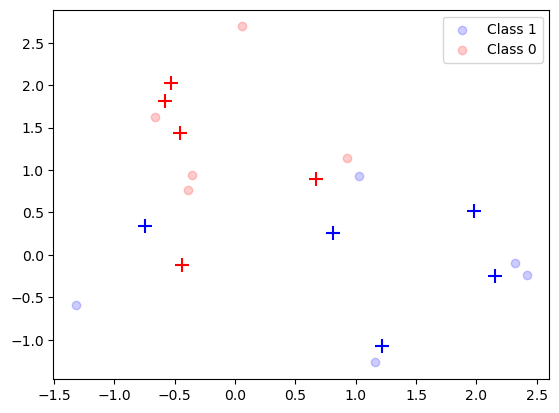

In [4]:
plt.scatter(traindata[:n, 0], traindata[:n, 1], c = "blue", alpha=0.2, label='Class 1')
plt.scatter(traindata[n:, 0], traindata[n:, 1], c = "red", alpha=0.2, label='Class 0')

plt.scatter(m1[:,0], m1[:,1], marker = '+', s = 100, c = "blue")
plt.scatter(m0[:,0], m0[:,1], marker = '+', s = 100, c = "red")

plt.legend()
plt.show()

In [5]:
id1 = np.random.randint(csize, size = n)


In [6]:
id1

array([0, 2, 2, 3, 4])

In [7]:
np.random.seed(100)

np.random.normal(loc=[1,1,1], scale=1)

array([-0.74976547,  1.3426804 ,  2.1530358 ])

## Part 2: kNN

In [27]:
#myk = [151, 101, 69, 45, 31, 21, 11, 7, 5, 3, 1]
myk = [5, 3, 1]

train_err_knn = []
test_err_knn = []

for j in myk:
    myknn = knn(n_neighbors = j)
    myknn.fit(traindata, ytrain)
    train_err_knn.append(1 - myknn.score(traindata, ytrain))
    test_err_knn.append(1- myknn.score(testdata, ytest))

In [28]:
np.column_stack((train_err_knn, test_err_knn))

array([[0.2, 0.2],
       [0.2, 0.1],
       [0. , 0.1]])

In [14]:
def eucledian_distance(A, B):
    M = A.shape[0]
    N = B.shape[0]
    
    A_dots = (A*A).sum(axis=1).reshape((M,1))*np.ones(shape=(1,N))
    B_dots = (B*B).sum(axis=1)*np.ones(shape=(M,1))
    
    D_squared =  A_dots + B_dots -2*A.dot(B.T)
    
    return D_squared
    
A = np.array([[1,2,3],[2,3,4],[0,1,2]])
B = np.array([[1,2,3],[4,3,2]])
eucledian_distance(A, B)

array([[ 0., 11.],
       [ 3.,  8.],
       [ 3., 20.]])

In [211]:
np.set_printoptions(threshold=np.inf)

def custom_knn(train_data, test_data, ytrain, k):
    distance_matrix = eucledian_distance(train_data, test_data)
    print(distance_matrix)
    
    distance_matrix_bk = distance_matrix
    kth_distance = np.sort(distance_matrix)[:, k]
    print(kth_distance)
    distance_matrix = np.transpose(np.where((distance_matrix <= kth_distance), np.transpose(distance_matrix), np.nan))    
    print(distance_matrix)
    
    top_k_indices = np.argsort(distance_matrix, axis=1)
    print(top_k_indices)
    #top_k_indices = top_k_indices[:, 1:]
    #top_k_indices = top_k_indices[:, :k]
    #print(top_k_indices[:, k-1])
    
    
    #print(np.transpose(np.where((distance_matrix <= kth_distance), np.transpose(distance_matrix), None)))
    #print(np.transpose(np.where((distance_matrix > kth_distance), np.transpose(distance_matrix), distance_matrix)))
    
    #print((np.where(distance_matrix <= np.transpose(kth_distance), distance_matrix, None)))
    #print(np.transpose(np.where((distance_matrix > 0), np.transpose(distance_matrix), None)))
    #print(ytrain.shape)
    
    ytrain_pred = ytrain[top_k_indices]
    print("---------------------")
    print(ytrain_pred)
    print(ytrain_pred * distance_matrix)
    ytrain_pred = ytrain_pred * distance_matrix
    ytrain_pred = ytrain_pred[:, 1:]
    print("---------------------")
    
    ytrain_pred_0_count = np.count_nonzero(ytrain_pred == 0, axis = 1)
    ytrain_pred_1_count = np.count_nonzero(ytrain_pred > 0, axis = 1)
    
    print(ytrain_pred_0_count)
    print(ytrain_pred_1_count)
    
    min_threshold = int(np.ceil(k/2))
    
    ytrain_pred = ytrain_pred_1_count > ytrain_pred_0_count
    ytrain_pred = ytrain_pred.astype(int)
    
    print(ytrain_pred)
    return ytrain_pred

# custom_knn(traindata, traindata, ytrain, 1)
# custom_knn(traindata, traindata, ytrain, 3)
# custom_knn(traindata, traindata, ytrain, 5)
# custom_knn(traindata, traindata, ytrain, 7)
custom_knn(traindata, traindata, ytrain, 5)

a = np.array([[0, 0, 0], [1,1,1], [1,1,-1], [1,1,-1]])
b = np.array([0, 1, 0, 1])
#custom_knn(a, a, b, 2)


[[ 0.          7.79720064 14.08708589 13.4836944   6.58678086  8.03670171
  12.68671473  3.25993921  5.34674809  2.7042745 ]
 [ 7.79720064  0.          3.28321767  2.70521531  4.82380229  0.05487771
   4.06129921  1.9168206   3.35239786  2.04053748]
 [14.08708589  3.28321767  0.          0.0304441   2.65386937  4.10498979
  14.13929432  9.08249113 12.97100509  8.91201601]
 [13.4836944   2.70521531  0.0304441   0.          2.73309098  3.44638513
  12.86152822  8.22802376 11.85764749  8.09930693]
 [ 6.58678086  4.82380229  2.65386937  2.73309098  0.          5.83703665
  16.89168591  7.15884731 11.69618633  6.54976792]
 [ 8.03670171  0.05487771  4.10498979  3.44638513  5.83703665  0.
   3.17416273  1.69448821  2.77672153  1.88324145]
 [12.68671473  4.06129921 14.13929432 12.86152822 16.89168591  3.17416273
   0.          3.25638526  1.6620786   3.91009165]
 [ 3.25993921  1.9168206   9.08249113  8.22802376  7.15884731  1.69448821
   3.25638526  0.          0.56887925  0.02989707]
 [ 5.346

In [197]:
x = np.array([np.nan, 1, 2, 3])
np.argsort(x)

array([1, 2, 3, 0])

In [ ]:
a = np.array([9, 4, 4, 3, 3, 9, 0, 4, 6, 0])
np.argpartition(a, -4)[-4:]
print(a)
print(np.argsort(a))
print(np.argsort(a, axis=0))
#print(np.argsort(a, axis=1))

In [ ]:
x = np.array([[3, 1, 2], [10, 1, 100]])
print(x)
print(np.argsort(x))
#print(x[np.argsort(x)])

In [ ]:
x = np.array([0., 7.79720064, 14.08708589, 13.4836944,   6.58678086,  8.03670171,12.68671473,  3.25993921,  5.34674809,  2.7042745 ])
print(x)
print(np.argsort(x))
print(x[np.argsort(x)])

In [134]:
x = np.array([[3, 1, 2], [10, 2, 100], [0, 0,0]])
print(x)
y = np.array([0,1,0])

print(x>y)

[[  3   1   2]
 [ 10   2 100]
 [  0   0   0]]
[[ True False  True]
 [ True  True  True]
 [False False False]]


In [67]:
x = np.array([
       [
              [1000,20],
              [300,40],
              [500,60]

       ],
       [
              [10000,200],
              [30,41],
              [50,6]

       ],
]
)

print(x)
print("---------------------")
print(np.argsort(x, axis=2))
print("---------------------")
print(np.sort(x, axis=0))
print("---------------------")
print(np.sort(x, axis=1))
print("---------------------")
print(np.sort(x, axis=2))
print("---------------------")


[[[ 1000    20]
  [  300    40]
  [  500    60]]

 [[10000   200]
  [   30    41]
  [   50     6]]]
---------------------
[[[1 0]
  [1 0]
  [1 0]]

 [[1 0]
  [0 1]
  [1 0]]]
---------------------
[[[ 1000    20]
  [   30    40]
  [   50     6]]

 [[10000   200]
  [  300    41]
  [  500    60]]]
---------------------
[[[  300    20]
  [  500    40]
  [ 1000    60]]

 [[   30     6]
  [   50    41]
  [10000   200]]]
---------------------
[[[   20  1000]
  [   40   300]
  [   60   500]]

 [[  200 10000]
  [   30    41]
  [    6    50]]]
---------------------
